In [12]:
# import required packages
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.utilities as u
import tempfile
import os
from IPython.display import Image, display

/Users/namir_oues/Documents/PhD/MDSubSampler


In [13]:
# set paths and all required arguments 
trajectory_file = "data/input.xtc"
topology_file = "data/input.gro"
atom_selection = "resid 120:160"
strata_number = 200
size = 10
dissimilarity_measure = d.Bhattacharyya
# set a temporary directory to save all output files 
temp_dir = tempfile.mkdtemp()

In [14]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [15]:
# create a protein property object
p_property = gp.RMSD(p_data, atom_selection, fit=True)

In [16]:
# calculate reference property for full trajectory
p_property.calculate_property()

In [17]:
# create uniform sampler object 
sampler = s.UniformSampler(
            protein_property=p_property,
            protein_data=p_data,
            output_folder=temp_dir,
            file_prefix='sc2',
            strata_number=strata_number,
            dissimilarity_measure=dissimilarity_measure)

In [18]:
# generate sampled property for specific sample size
sampled_property = sampler.sample(round(int(size) * p_data.n_frames / 100))

In [19]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='sc2',
    p_prop=p_property,
    s_prop=sampled_property,
    p_data=p_data,
    p=size,
    machine_learning=None,
)

In [20]:
# generate plot and save file in temporary directory
u.plot_property(output_folder=temp_dir,
            file_prefix='sc2',
            p_prop=p_property,
            s_prop=sampled_property,
            p=size,)

<Figure size 640x480 with 0 Axes>

In [21]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['sc2_10_RMSD.dat', 'sc2_10_RMSD.xtc', 'sc2_10_RMSD.npy', 'sc2_10_RMSD_plot.png']


0 1.4744275129937738
366 1.59143542519017
531 1.6424979187898676
536 1.6588671378485005
29 1.6872463430482636
3 1.6939923090588904
32 1.7110401110195808
598 1.7238523269444865
543 1.733845444751941
6 1.7464154567019918
26 1.7501208894670455
368 1.766264249740998
461 1.7715458739836236
38 1.7803317013967004
712 1.7890080288385204
458 1.7966169950739517
381 1.8045684574460619
371 1.8228432993461283
321 1.831453143163405
367 1.8390623632798793
7 1.8458454340150163
586 1.8602963285069811
18 1.8611991976033124
375 1.8725755723795918
600 1.8806745844646768
23 1.8965440290439448
524 1.9074190006221348
373 1.91624642033088
462 1.9235747788742925
384 1.9310221574960917
571 1.9414459487024294
557 1.9459264393770446
575 1.957339258498001
559 1.972338636317849
257 1.9778626629291607
363 1.9879073881517522
101 1.9935251203575073
48 2.011462143376483
307 2.0151080866421576
532 2.0217873242103086
45 2.0323101355132915
655 2.0399252918805324
69 2.052317765130585
466 2.067224250190137
470 2.06818958645

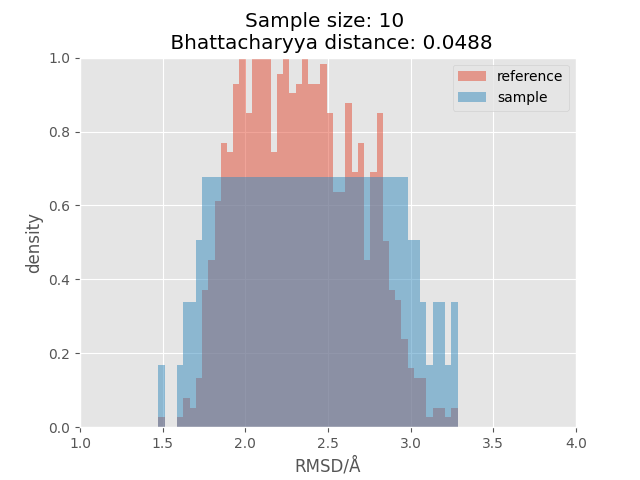

In [22]:
# display table with calculated property for sample size and distribution plot
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        display(Image(filename=fpath))
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)  